In [ ]:
pip install qiskit

In [ ]:
pip install matplotlib

In [ ]:
import qiskit

In [ ]:
qiskit.__qiskit_version__

In [ ]:
from qiskit import IBMQ

In [ ]:
IBMQ.save_account('')

In [ ]:
IBMQ.load_account()

สวัสดีชาวโลก | Hello World

In [24]:
from qiskit import *

In [25]:
qr = QuantumRegister(2)

In [26]:
cr = ClassicalRegister(2)

In [27]:
circuit = QuantumCircuit(qr, cr)

In [28]:
%matplotlib inline

In [29]:
circuit.draw()

q9_0: 
      
q9_1: 
      
c1: 2/

In [30]:
circuit.h(qr[0])

In [31]:
circuit.draw()

┌───┐
q9_0: ┤ H ├
      └───┘
q9_1: ─────
           
c1: 2/═════

In [32]:
circuit.cx(qr[0], qr[1])

In [33]:
circuit.draw()

┌───┐     
q9_0: ┤ H ├──■──
      └───┘┌─┴─┐
q9_1: ─────┤ X ├
           └───┘
c1: 2/══════════

In [34]:
circuit.measure(qr, cr)

In [35]:
circuit.draw()

┌───┐     ┌─┐   
q9_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q9_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1

In [36]:
simulator = Aer.get_backend('qasm_simulator')

In [37]:
result = execute(circuit, backend= simulator).result()

In [38]:
from qiskit.tools.visualization import plot_histogram

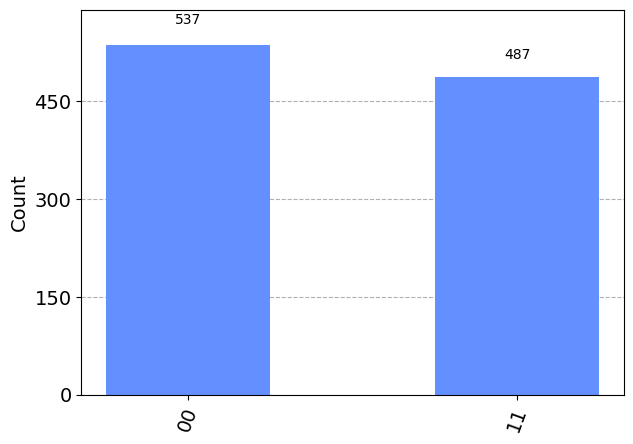

In [39]:
plot_histogram(result.get_counts(circuit))

In [ ]:
IBMQ.load_account()

In [ ]:
provider = IBMQ.get_provider('ibm-q')

In [ ]:
qcomp = provider.get_backend('ibmq_belem')

In [ ]:
job = execute(circuit, backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor

In [ ]:
job_monitor(job)

In [ ]:
result = job.result()

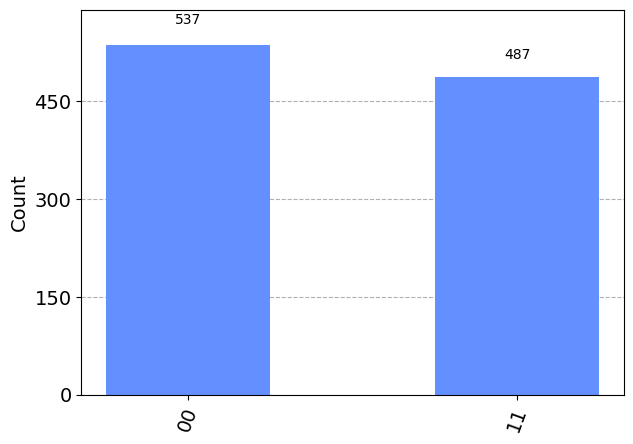

In [40]:
plot_histogram(result.get_counts(circuit))

ลอจิกเกต | Gates

In [41]:
from qiskit import *

In [42]:
from qiskit.tools.visualization import  plot_bloch_multivector

In [43]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend= simulator).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [44]:
circuit.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

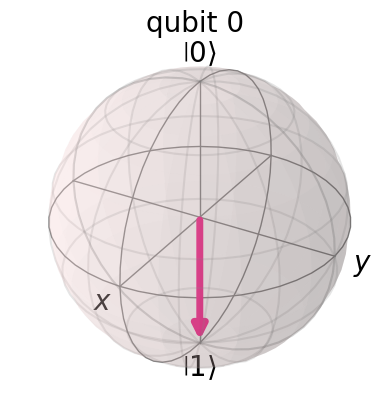

In [45]:
plot_bloch_multivector(statevector)

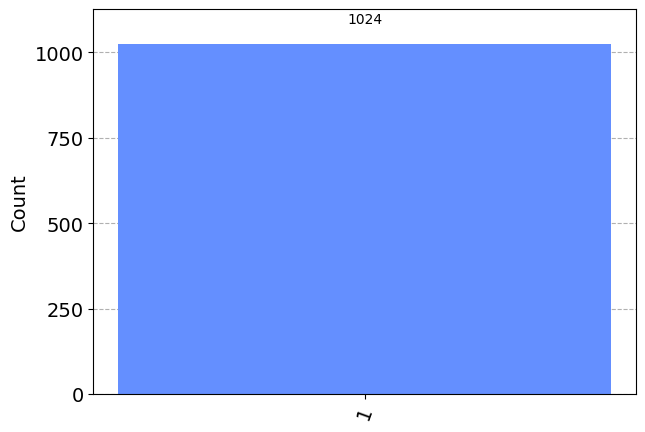

In [46]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= backend, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import  plot_histogram
plot_histogram(counts)

In [47]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend= simulator).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


เทเลพอร์ต | Teleportation

In [48]:
from qiskit import *

In [49]:
circuit = QuantumCircuit(3, 3)

In [50]:
%matplotlib inline

In [51]:
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [52]:
circuit.x(0)
circuit.barrier()
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [53]:
circuit.h(1)
circuit.cx(1,2)

In [54]:
circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [55]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw()

┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

In [56]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [57]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

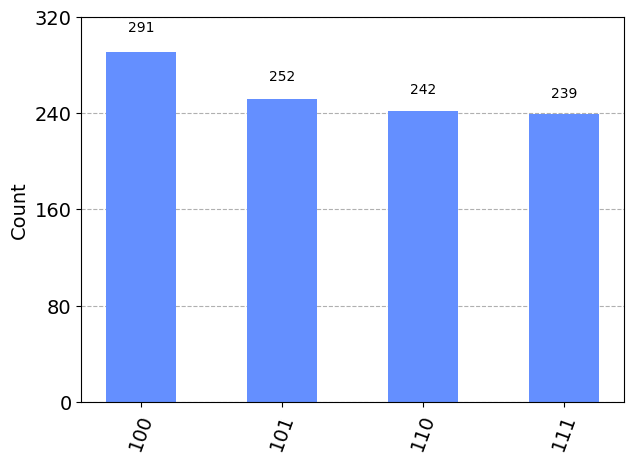

In [58]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [59]:
print(counts)

{'110': 242, '101': 252, '111': 239, '100': 291}


อัลกอริทึม | Bernstein Vazirani

In [60]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [61]:
secretnumber = '01000001'

In [62]:
#circuit = QuantumCircuit(6+1, 6)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
#circuit.x(6)
circuit.x(len(secretnumber))
#circuit.h(6)
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

In [63]:
circuit.draw()

┌───┐      ░            ░ ┌───┐ ░ ┌─┐                     
q_0: ┤ H ├──────░───■────────░─┤ H ├─░─┤M├─────────────────────
     ├───┤      ░   │        ░ ├───┤ ░ └╥┘┌─┐                  
q_1: ┤ H ├──────░───┼────────░─┤ H ├─░──╫─┤M├──────────────────
     ├───┤      ░   │        ░ ├───┤ ░  ║ └╥┘┌─┐               
q_2: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫─┤M├───────────────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐            
q_3: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫─┤M├────────────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐         
q_4: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫──╫─┤M├─────────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐      
q_5: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├──────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───
     ├───┤      ░   │    │   ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ H ├──────░───┼────┼───░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
q_8: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║ 
c: 8/═══════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                                        0  1  2  3  4  5  6  7

In [64]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots= 1).result()
counts = result.get_counts()
print(counts)

{'01000001': 1}


Programming on Quantum Computeres